In [ ]:
import os
import pandas as pd

# Folder containing the text files
folder_path = r"C:\Users\Admin\Downloads\archive (1)\data"  # Replace with your folder path

# Initialize an empty list to store the data
data_list = []

# Iterate through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):  # Process only text files
        file_path = os.path.join(folder_path, file_name)
        
        # Read the text file
        with open(file_path, 'r', encoding='utf-8') as file:
            text_data = file.read()
        
        # Append the file name and content to the list
        data_list.append({"file_name": file_name, "content": text_data})

# Convert the list to a DataFrame
combined_data = pd.DataFrame(data_list)

# Display the combined DataFrame
print(combined_data.head())

# Save the DataFrame to a CSV file
output_csv_path = r"C:\Users\Admin\Downloads\data_combined.csv"
combined_data.to_csv(output_csv_path, index=False)

print("All text files have been combined into:", output_csv_path)


In [1]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import spacy
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/Admin/Downloads/data_combined.csv")  
print("Dataset loaded. Shape:", data.shape)
print(data.head())

Dataset loaded. Shape: (27442, 2)
            file_name                                            content
0  article_000000.txt  New York police are concerned drones could bec...
1  article_000001.txt  By . Ryan Lipman . Perhaps Australian porn sta...
2  article_000002.txt  This was, Sergio Garcia conceded, much like be...
3  article_000003.txt  An Ebola outbreak that began in Guinea four mo...
4  article_000004.txt  By . Associated Press and Daily Mail Reporter ...


In [3]:
def clean_text(text):
    """Clean text by removing HTML tags, special characters, and extra whitespace."""
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text.lower()

In [4]:
data['cleaned_text'] = data['file_name'].apply(clean_text)  # Replace 'text' with the column name
print("Text preprocessing completed.")

C:\Users\Admin\AppData\Local\Temp\ipykernel_22748\3703787200.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags


Text preprocessing completed.


In [5]:
print(data.columns)



Index(['file_name', 'content', 'cleaned_text'], dtype='object')


In [6]:
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    """Extract entity counts (ORG, GPE, PERSON) from text."""
    doc = nlp(text)
    entity_counts = {"ORG": 0, "GPE": 0, "PERSON": 0}
    for ent in doc.ents:
        if ent.label_ in entity_counts:
            entity_counts[ent.label_] += 1
    return entity_counts

data['entities'] = data['cleaned_text'].apply(extract_entities)
data['org_count'] = data['entities'].apply(lambda x: x['ORG'])
data['gpe_count'] = data['entities'].apply(lambda x: x['GPE'])
data['person_count'] = data['entities'].apply(lambda x: x['PERSON'])
print("Named Entity Recognition completed.")

Named Entity Recognition completed.


In [9]:
data['article_length'] = data['cleaned_text'].apply(lambda x: len(x.split()))
data['sentiment'] = data['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [11]:
features = ['org_count', 'gpe_count', 'person_count', 'article_length', 'sentiment']
target = 'engagement'  

In [14]:
target = 'actual_target_column_name'  # Replace with the correct column name


In [15]:
# Create a synthetic 'engagement' column for testing
data['engagement'] = pd.Series([10, 20, 30, 40, 50])  # Replace with meaningful test values
target = 'engagement'



In [16]:
# Define features and target
features = ['org_count', 'gpe_count', 'person_count', 'article_length', 'sentiment']
target = 'engagement'  # Replace this with the correct column name if it exists

# Verify column names
print("Columns in the dataset:", data.columns)

# Split features and target
X = data[features]
y = data[target]


Columns in the dataset: Index(['file_name', 'content', 'cleaned_text', 'entities', 'org_count',
       'gpe_count', 'person_count', 'article_length', 'sentiment',
       'engagement'],
      dtype='object')


In [17]:
X = data[features]
y = data[target]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Removing rows with NaN in y_train
import numpy as np
import pandas as pd

# Assuming X_train and y_train are DataFrames or Series
X_train_clean = X_train[~y_train.isna()]
y_train_clean = y_train.dropna()


In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median'
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()


In [21]:
print(X_train.isna().sum())
print(y_train.isna().sum())


org_count         0
gpe_count         0
person_count      0
article_length    0
sentiment         0
dtype: int64
21949


In [22]:
# Remove rows where y_train contains NaN values
valid_data = ~y_train.isna()  # boolean mask for valid data
X_train_clean = X_train[valid_data]
y_train_clean = y_train[valid_data]
model.fit(X_train_clean, y_train_clean)


RandomForestRegressor(random_state=42)

In [23]:
from sklearn.impute import SimpleImputer

# Impute missing values using the mean (or median)
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
model.fit(X_train, y_train_imputed)


RandomForestRegressor(random_state=42)

In [24]:
print(y_train.isna().sum())  # Check the number of missing values in y_train


21949


In [25]:
print(X_train.isna().sum())  # Check for missing values in X_train
print(y_train.isna().sum())  # Check for missing values in y_train
print(y_test.isna().sum())   # Check for missing values in y_test


org_count         0
gpe_count         0
person_count      0
article_length    0
sentiment         0
dtype: int64
21949
5488


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [27]:
print(y_train.isna().sum())  # Check for missing values in y_train


21949


In [28]:
valid_data = ~y_train.isna()  # Boolean mask for valid data
X_train_clean = X_train[valid_data]
y_train_clean = y_train[valid_data]
model.fit(X_train_clean, y_train_clean)


RandomForestRegressor(random_state=42)

In [29]:
from sklearn.impute import SimpleImputer

# Impute missing values using the mean (or median)
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
model.fit(X_train, y_train_imputed)


RandomForestRegressor(random_state=42)

In [30]:
print(X_train.shape)
print(y_train.shape)


(21953, 5)
(21953,)


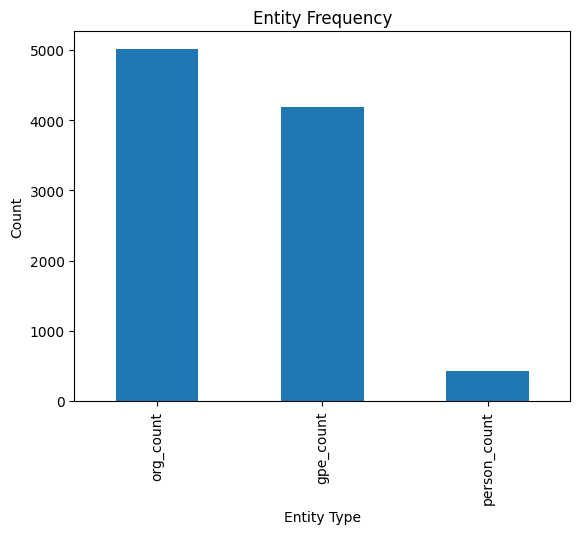

In [31]:
entity_counts = data[['org_count', 'gpe_count', 'person_count']].sum()
entity_counts.plot(kind='bar', title="Entity Frequency", ylabel="Count", xlabel="Entity Type")
plt.show()


In [32]:
target = 'actual_target_column_name'

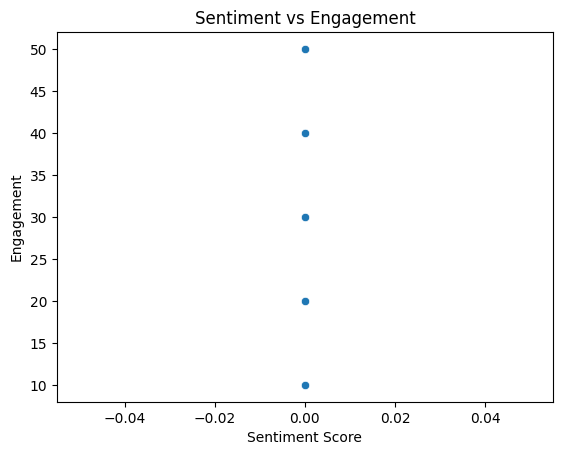

In [33]:
sns.scatterplot(x=data['sentiment'], y=data['engagement'])
plt.title("Sentiment vs Engagement")
plt.xlabel("Sentiment Score")
plt.ylabel("Engagement")
plt.show()


In [37]:
print(data.dtypes)


file_name          object
content            object
cleaned_text       object
entities           object
org_count           int64
gpe_count           int64
person_count        int64
article_length      int64
sentiment         float64
engagement        float64
dtype: object


In [38]:
# Drop non-numeric columns
data_numeric = data.select_dtypes(include=['number'])

# Now calculate correlation
correlation = data_numeric.corr()


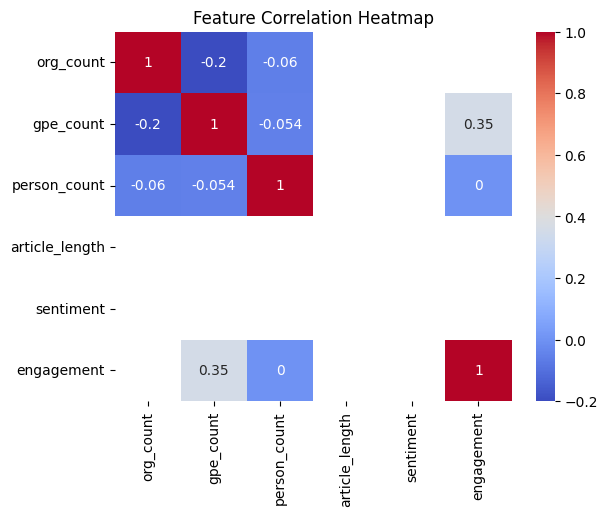

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure only numeric columns are used for correlation calculation
data_numeric = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation = data_numeric.corr()

# Plot the correlation heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


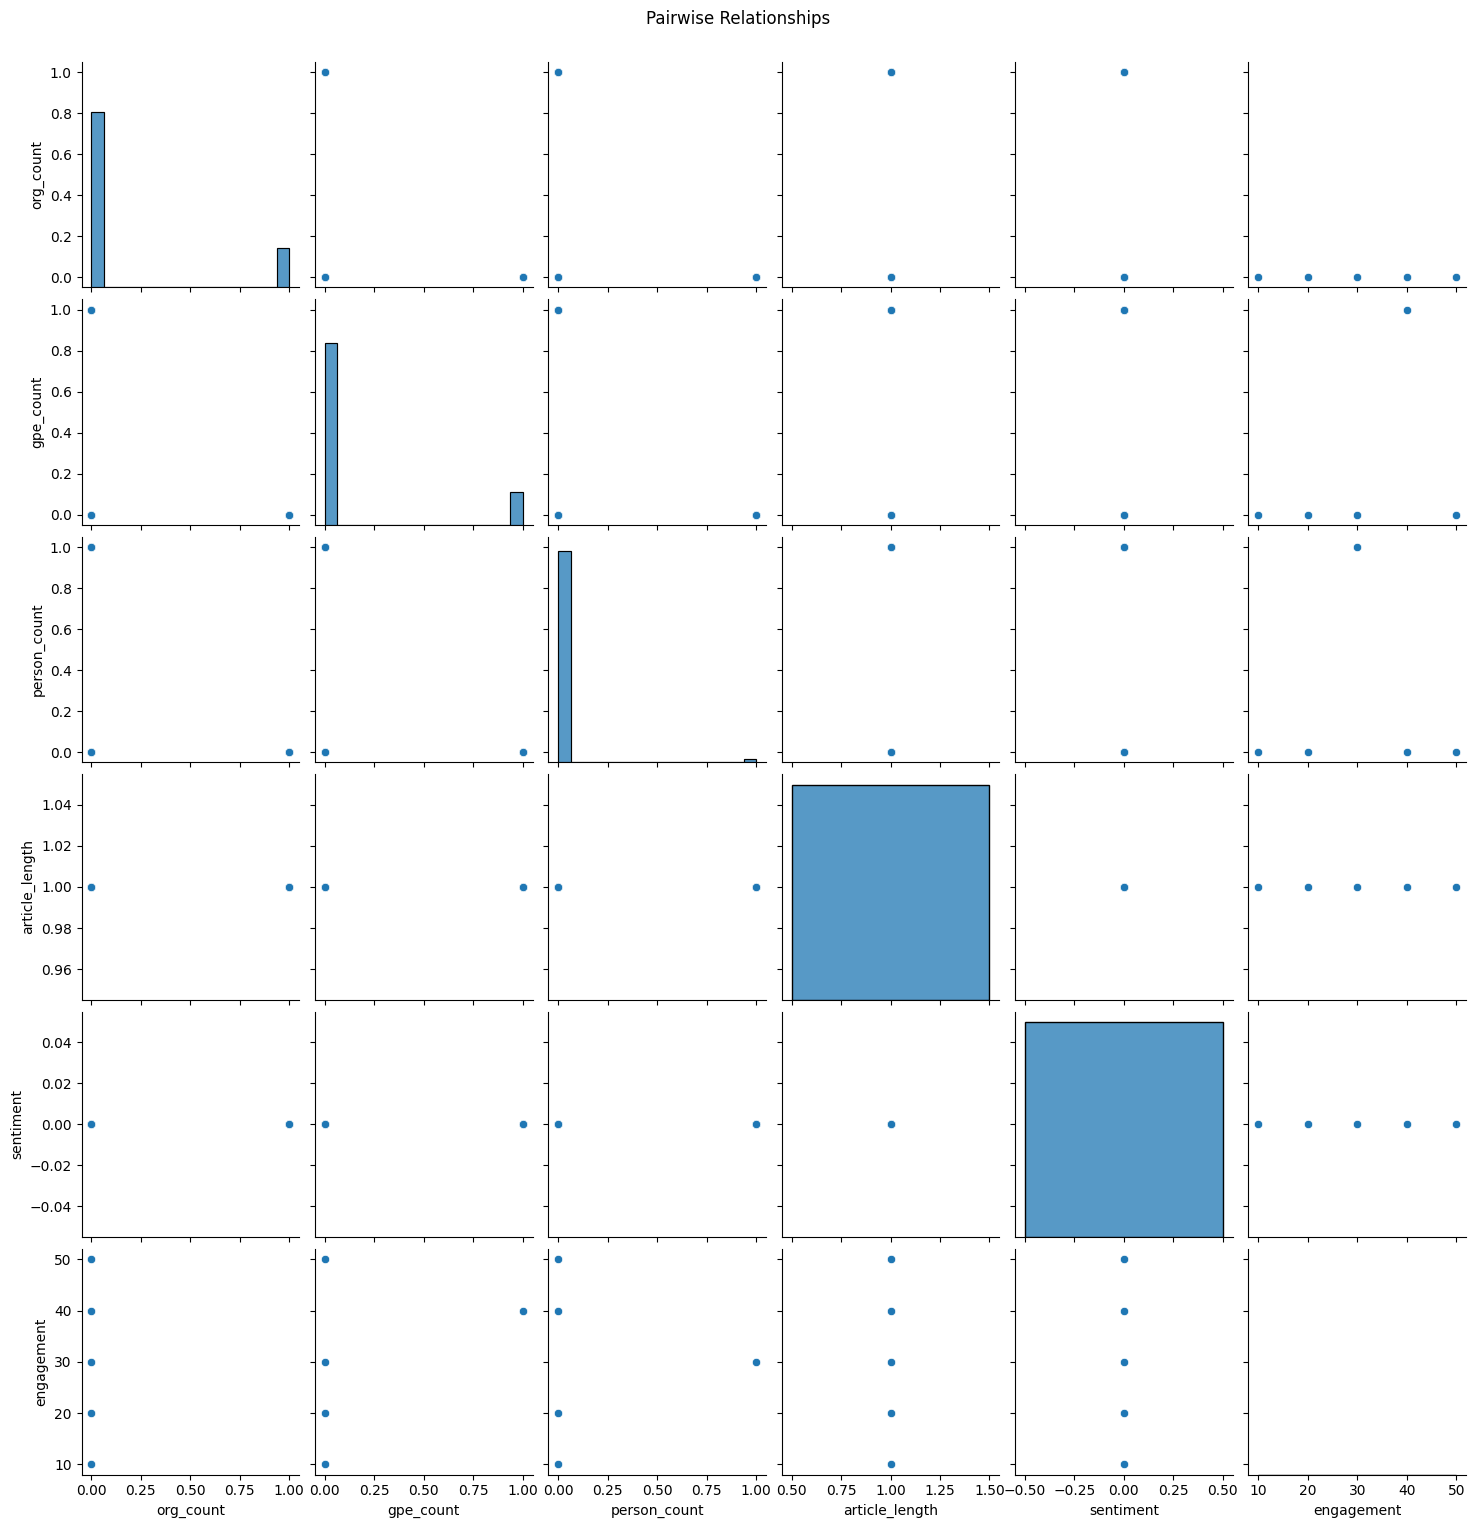

In [41]:
sns.pairplot(data_numeric)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

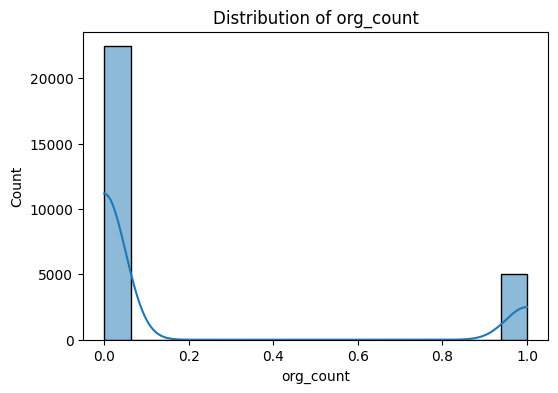

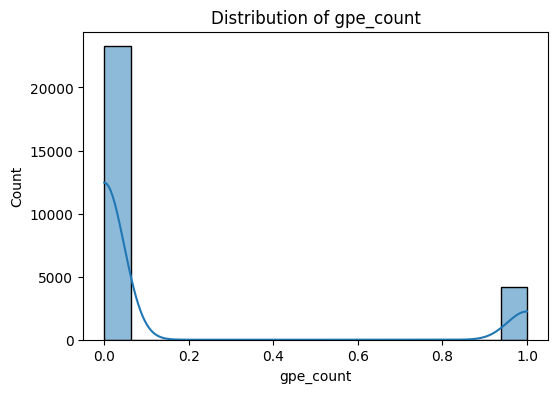

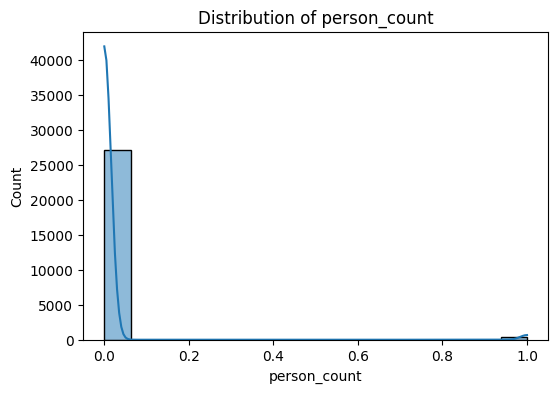

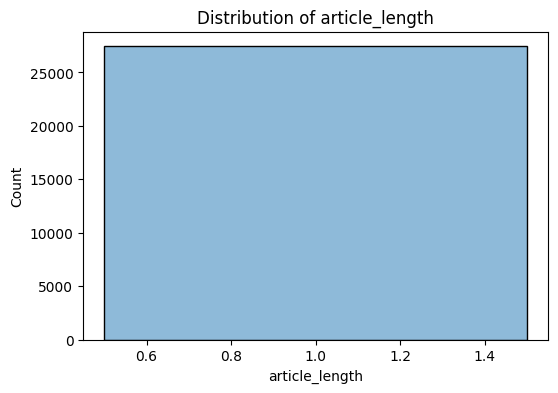

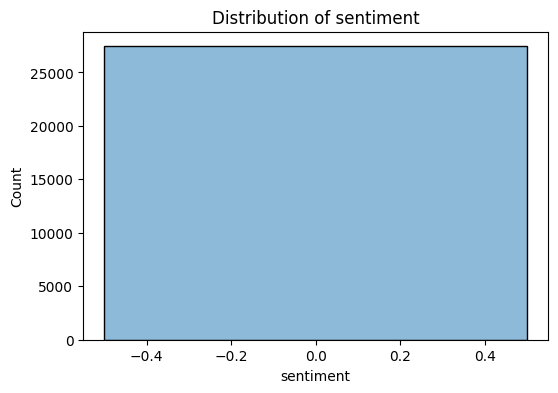

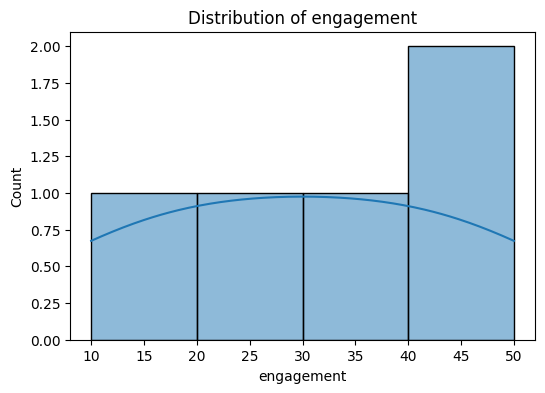

In [42]:
import seaborn as sns

# Visualize the distribution of each feature
for column in data_numeric.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data_numeric[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

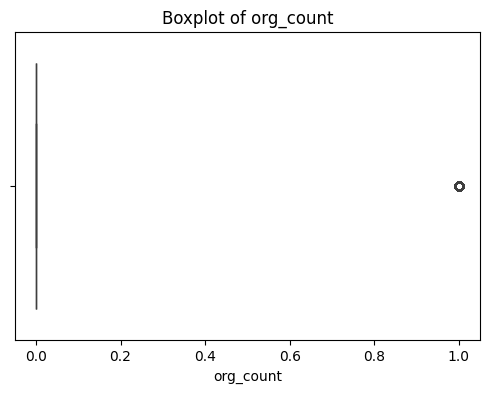

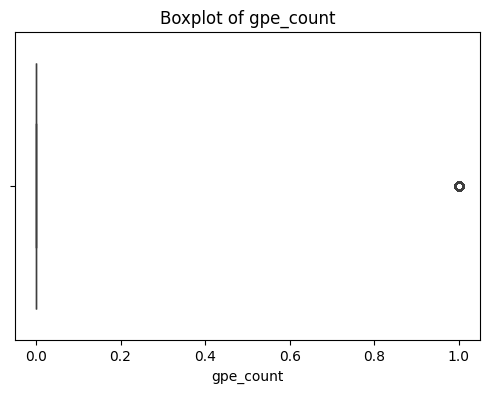

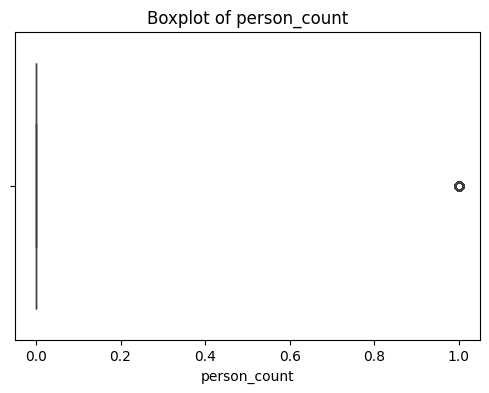

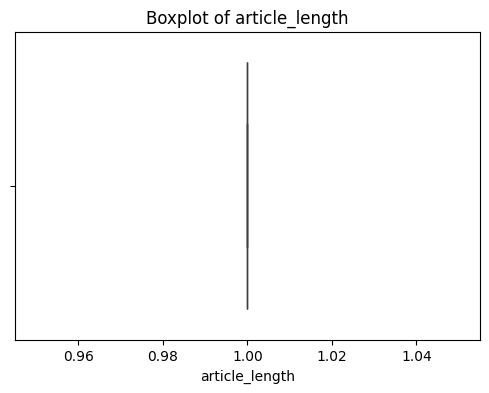

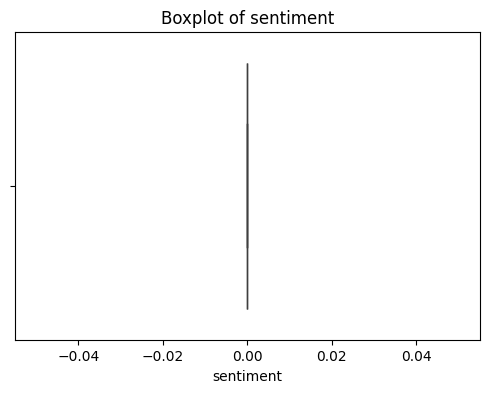

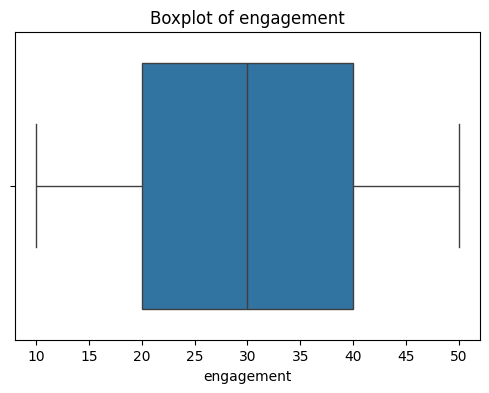

In [43]:
for column in data_numeric.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data_numeric[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

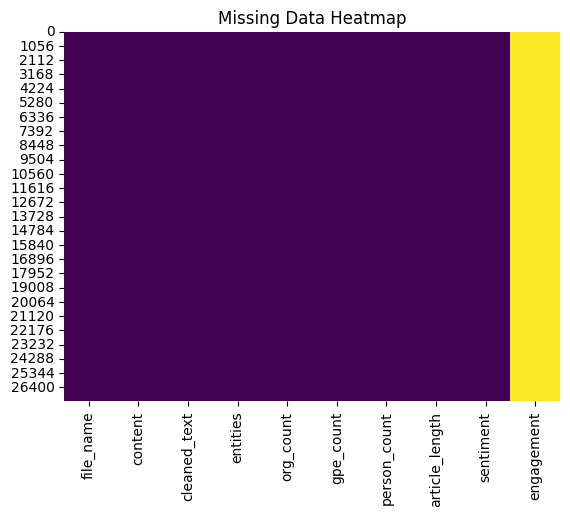

In [44]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()